In [3]:
base_lr = 0.001
max_lr = 0.1
step_size = 8
def masterScheduler(epoch):
    def scheduler():
            period = 2 * step_size
            cycle = math.floor(1 + epoch/period)
            x = abs(epoch/step_size - 2*cycle + 1)
            delta = (max_lr - base_lr)*max(0, (1 - x))
            delta /= float(2 ** (cycle - 1))
            return base_lr + delta
    return scheduler

Text(0.5, 1.0, 'LR schedule')

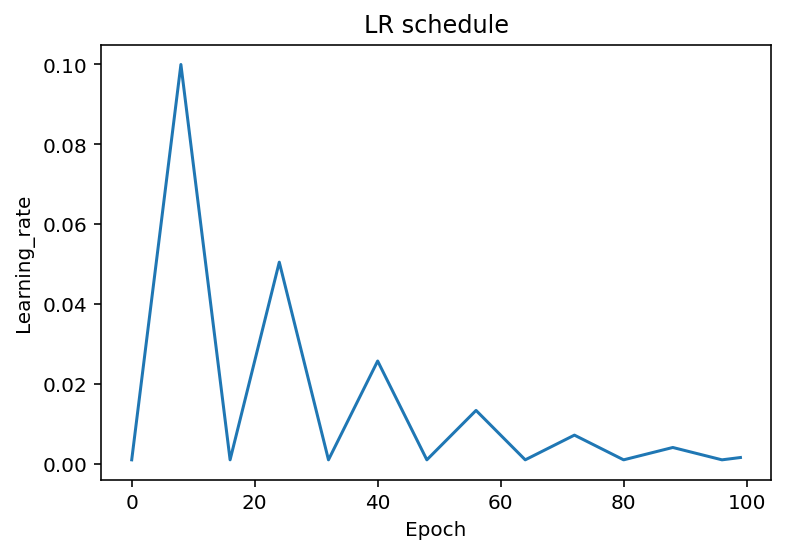

In [7]:
lr_schedule = []
for i in range(100):
    lr_schedule.append(masterScheduler(i)())
plt.plot(lr_schedule)
plt.xlabel("Epoch")
plt.ylabel("Learning_rate")
plt.title("LR schedule")

In [1]:
import numpy as np
from music21 import *
import glob
import sys
import math
from tensorflow.keras.models import Sequential, Model, load_model
sys.path.append("../RL modules/")
from env_noOctave import SegmentationEnv
import matplotlib.pyplot as plt

In [2]:
training_pieces = []
testing_pieces = []
for piece in glob.glob('./normal/training/*'):
    training_pieces.append(piece)

for piece in glob.glob('./normal/testing/*'):
    testing_pieces.append(piece)

In [3]:
testing_pieces 

['./normal/testing\\Bach_Prelude_I.mxl',
 './normal/testing\\Debussy_Arabesque_No._1_in_E_Major.musicxml',
 './normal/testing\\Il_Vecchio_Castello.mxl',
 './normal/testing\\Piano_Sonata_No._11.mxl',
 './normal/testing\\Prélude_in_C_Minor.mxl',
 './normal/testing\\Waltz_in_A_Minor.mxl',
 './normal/testing\\Étude_in_C_Minor.mxl']

In [4]:
for pieces in testing_pieces:
    try:
        c = converter.parse(pieces)
        x = True
        for ts in c.recurse().getElementsByClass(meter.TimeSignature):
            print(pieces,ts)
            x = False
            break
        if x:
            print("NO TIME SIGNATURE",pieces)
    except:
        print("ERrOR IN PIECE",pieces)

./normal/testing\Bach_Prelude_I.mxl <music21.meter.TimeSignature 4/4>
./normal/testing\Debussy_Arabesque_No._1_in_E_Major.musicxml <music21.meter.TimeSignature 4/4>
./normal/testing\Il_Vecchio_Castello.mxl <music21.meter.TimeSignature 6/8>
./normal/testing\Piano_Sonata_No._11.mxl <music21.meter.TimeSignature 2/4>
./normal/testing\Prélude_in_C_Minor.mxl <music21.meter.TimeSignature 4/4>
./normal/testing\Waltz_in_A_Minor.mxl <music21.meter.TimeSignature 3/4>
./normal/testing\Étude_in_C_Minor.mxl <music21.meter.TimeSignature 4/4>


In [11]:
model = load_model("dqnlstmnew_cpt")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3, 26)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               79360     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 87,746
Trainable params: 87,746
Non-trainable params: 0
_________________________________________________________________


In [5]:
env = SegmentationEnv(training_pieces)

start
change key
change key
change key
change key
change key
change key
change key
change key
./normal/training\Fugue_in_G_Minor.mxl
start
change key
./normal/training\G_minor.mxl
start
change key
change key
change key
change key
./normal/training\Menuet_in_G_Minor.mxl
start
change key
change key
./normal/training\Minuet_in_F.mxl
start
change key
change key
./normal/training\Minuet_in_G_Major.mxl
start
change key
change key
change key
change key
change key
change key
change key
./normal/training\Moonlight_Sonata_1st_Movement.mxl
start
change key
change key
./normal/training\Musette_in_D.mxl
start
change key
change key
change key
change key
change key
change key
change key
change key
change key
change key
change key
change key
./normal/training\Nocturne_in_B_Major.mxl
start
change key
change key
change key
change key
change key
change key
change key
change key
./normal/training\Nocturne_in_C#_Minor.mxl
start
change key
change key
change key
./normal/training\Nocturne_in_Eb_Major.mxl
sta

In [6]:
env2 = SegmentationEnv(testing_pieces)

start
./normal/testing\Bach_Prelude_I.mxl
start
change key
change key
change key
change key
change key
change key
change key
change key
change key
change key
change key
change key
./normal/testing\Debussy_Arabesque_No._1_in_E_Major.musicxml
start
change key
change key
change key
change key
change key
change key
change key
change key
change key
change key
change key
change key
./normal/testing\Il_Vecchio_Castello.mxl
start
change key
change key
change key
change key
change key
change key
change key
change key
change key
change key
./normal/testing\Piano_Sonata_No._11.mxl
start
./normal/testing\Prélude_in_C_Minor.mxl
start
change key
change key
change key
change key
change key
change key
./normal/testing\Waltz_in_A_Minor.mxl
start
change key
change key
change key
change key
change key
change key
change key
change key
./normal/testing\Étude_in_C_Minor.mxl
Total number of pieces 7


In [14]:
def Visualization(piece,offset): #offset assume sorted.
    def cal_offset(e):
        if e is None:
            return 0
        return e.offset + cal_offset(e.activeSite)
    c = converter.parse(piece)
    # partStream = c.parts.stream()
    # post = c.flattenParts().flat
    all_notes = []
    # for note in post.notes:
    #     print(note,note.offset,note.lyric)
    for el in c.recurse().notes:
        if el.lyric is not None:
            el.lyric = el.lyric.replace("♭", "b")
        all_notes.append([el.lyric, el, cal_offset(el),el.duration.linked])
    b = sorted(all_notes, key=lambda x: x[0] if x[0] is not None else "ZZZ")
    b = sorted(b, key=lambda x: x[-2])
    # print(b)
    for e in b:
        if len(offset) >0 and float(round(e[2],1)) >= offset[0] and e[3]:
            del offset[0]
            e[1].addLyric("CUT")
    GEX = musicxml.m21ToXml.GeneralObjectExporter(c)
    out = GEX.parse()
    piecename = piece.split("\\")[-1]
    piecename = piecename.split(".")[0]
    piecename = "LSTMVis_"+piecename + ".musicxml"
    print(piece,piecename)
    with open(piecename, "wb") as f:
        f.write(out)

In [7]:
def getoffset(offsets,segments):
    off = []
    for i in range(len(offsets)):
        if segments[i]:
            off.append(offsets[i])
    return off,offsets[-1]

In [10]:
###NORMAL
from dhd import segmentation_quality
sqs1 = []
fmea1 = []
for i in range(len(env.notes)):
    offsets = []
    obs = env.reset(i)
    total_reward = 0
    max_reward = 0
    num_correct_segment = 0
    tp,tn,fp,fn = 0,0,0,0
    while True:
        obs = obs.reshape((1, 12*2+1))
        action = np.argmax(model.predict(obs))
        if action == 1:
            offsets.append(env.current_noteoffset)
        obs, reward, done, info = env.step(action)
        #env.render()
        total_reward += reward
        max_reward += 1
        if reward ==1 and action == 1:
            num_correct_segment += 1
            tp += 1
        elif reward == 1 and action == 0:
            tn += 1
        elif action == 1:
            fp += 1
        else:
            fn += 1
        if done:
            break
    if tp+fp == 0:
        precision = 0
    else:
        precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    if tp == 0:
        fm = 0
    else:
        fm = 2*precision*recall/(precision+recall)
    gtoffsets,foffset = getoffset(env.offset[i],env.is_segment[i])
    if len(offsets) == 0:
        off = [(0,foffset)]
    else:
        off = [(0, offsets[0])]
        for k in range(1, len(offsets)):
            off.append((offsets[k - 1], offsets[k]))
        off.append((offsets[-1], foffset))
    gtoff = [(0, gtoffsets[0])]
    for k in range(1, len(gtoffsets)):
        gtoff.append((gtoffsets[k - 1], gtoffsets[k]))
    gtoff.append((gtoffsets[-1], foffset))
    sq = segmentation_quality(off,gtoff)
    print(f"Piece {training_pieces[i]}, total reward = {total_reward}/{max_reward}, f-measure = {fm}, sq = {sq}")
    fmea1.append(fm)
    sqs1.append(sq)
print(np.min(fmea1),np.max(fmea1),np.mean(fmea1))
print(np.min(sqs1),np.max(sqs1),np.mean(sqs1))

Piece ./normal/training\Fugue_in_G_Minor.mxl, total reward = -105/269, f-measure = 0, sq = 0.03358208955223885
Piece ./normal/training\G_minor.mxl, total reward = 105/261, f-measure = 0, sq = 0.03076923076923077
Piece ./normal/training\Menuet_in_G_Minor.mxl, total reward = 26/94, f-measure = 0, sq = 0.06382978723404253
Piece ./normal/training\Minuet_in_F.mxl, total reward = 21/71, f-measure = 0, sq = 0.08450704225352113
Piece ./normal/training\Minuet_in_G_Major.mxl, total reward = 32/120, f-measure = 0, sq = 0.07563025210084029
Piece ./normal/training\Moonlight_Sonata_1st_Movement.mxl, total reward = -31/137, f-measure = 0, sq = 0.02941176470588236
Piece ./normal/training\Musette_in_D.mxl, total reward = 46/56, f-measure = 0, sq = 0.2909090909090909
Piece ./normal/training\Nocturne_in_B_Major.mxl, total reward = 70/384, f-measure = 0, sq = 0.028807201800450155
Piece ./normal/training\Nocturne_in_C#_Minor.mxl, total reward = 132/364, f-measure = 0, sq = 0.027100271002710064
Piece ./norm

KeyboardInterrupt: 

In [ ]:
###NORMAL
from dhd import segmentation_quality
sqs1 = []
fmea1 = []
for i in range(len(env2.notes)):
    offsets = []
    obs = env2.reset(i)
    total_reward = 0
    max_reward = 0
    num_correct_segment = 0
    tp,tn,fp,fn = 0,0,0,0
    while True:
        obs = obs.reshape((1, 12*2+1))
        action = np.argmax(model.predict(obs))
        if action == 1:
            offsets.append(env2.current_noteoffset)
        obs, reward, done, info = env2.step(action)
        #env.render()
        total_reward += reward
        max_reward += 1
        if reward ==1 and action == 1:
            num_correct_segment += 1
            tp += 1
        elif reward == 1 and action == 0:
            tn += 1
        elif action == 1:
            fp += 1
        else:
            fn += 1
        if done:
            break
    if tp+fp == 0:
        precision = 0
    else:
        precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    if tp == 0:
        fm = 0
    else:
        fm = 2*precision*recall/(precision+recall)
    gtoffsets,foffset = getoffset(env2.offset[i],env2.is_segment[i])
    if len(offsets) == 0:
        off = [(0,foffset)]
    else:
        off = [(0, offsets[0])]
        for k in range(1, len(offsets)):
            off.append((offsets[k - 1], offsets[k]))
        off.append((offsets[-1], foffset))
    gtoff = [(0, gtoffsets[0])]
    for k in range(1, len(gtoffsets)):
        gtoff.append((gtoffsets[k - 1], gtoffsets[k]))
    gtoff.append((gtoffsets[-1], foffset))
    sq = segmentation_quality(off,gtoff)
    print(f"Piece {testing_pieces[i]}, total reward = {total_reward}/{max_reward}, f-measure = {fm}, sq = {sq}")
    fmea1.append(fm)
    sqs1.append(sq)
print(np.min(fmea1),np.max(fmea1),np.mean(fmea1))
print(np.min(sqs1),np.max(sqs1),np.mean(sqs1))

In [25]:
print(np.min(fmea1),np.max(fmea1),np.mean(fmea1))
print(np.min(sqs1),np.max(sqs1),np.mean(sqs1))

0.45454545454545453 0.9195402298850576 0.633209981262427
0.6666666666666667 0.8541666666666666 0.749366546836274


In [17]:
print(np.min(fmea),np.max(fmea),np.mean(fmea))
print(np.min(sqs),np.max(sqs),np.mean(sqs))

0.10526315789473682 0.963855421686747 0.6213222808144819
0.4970414201183432 0.9361702127659575 0.7362765893209061


In [10]:
fmea1 = fmea1[:-1]
sqs1 = sqs1[:-1]

In [25]:
print(np.min(fmea1),np.max(fmea1),np.mean(fmea1))
print(np.min(sqs1),np.max(sqs1),np.mean(sqs1))

0.5723905723905724 0.8571428571428571 0.6653673010992658
0.6367924528301887 0.8226600985221675 0.7460459816540839


In [11]:
print(np.min(fmea1),np.max(fmea1),np.mean(fmea1)) # This one is weighted version
print(np.min(sqs1),np.max(sqs1),np.mean(sqs1))

0.6045016077170418 0.7948717948717948 0.7042134715631346
0.6666666666666667 0.8357963875205254 0.7576964469000034


In [ ]:
print(np.min(fmea1),np.max(fmea1),np.mean(fmea1)) # This one is weighted least loss version
print(np.min(sqs1),np.max(sqs1),np.mean(sqs1))

In [ ]:
###LSTM Version
for i in range(len(env.notes)):
    offsets = []
    obs = env.reset(i)
    total_reward = 0
    max_reward = 0
    num_correct_segment = 0
    state_data = []
    for j in range(3 - 1):
        state_data.append(np.append(np.zeros((12 * 2 + 1,)), -1))
    state_data.append(np.append(obs, -1))
    while True:
        state_datax = np.array(state_data)
        state_datax = state_datax.reshape((1, 10, 2 * 12 + 1 + 1))
        action = np.argmax(model.predict(state_datax))
        if action == 1:
            offsets.append(env.current_noteoffset)
        obs, reward, done, info = env.step(action)
        #env.render()
        del state_data[0]
        state_data[-1][-1] = action
        state_data.append(np.append(obs, -1))
        total_reward += reward
        max_reward += 1
        if reward ==1 and action == 1:
            num_correct_segment += 1
        if done:
            break
    if tp+fp == 0:
        precision = 0
    else:
        precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    if tp == 0:
        fm = 0
    else:
        fm = 2*precision*recall/(precision+recall)
    gtoffsets,foffset = getoffset(env2.offset[i],env2.is_segment[i])
    if len(offsets) == 0:
        off = [(0,foffset)]
    else:
        off = [(0, offsets[0])]
        for k in range(1, len(offsets)):
            off.append((offsets[k - 1], offsets[k]))
        off.append((offsets[-1], foffset))
        gtoff = [(0, gtoffsets[0])]
        for k in range(1, len(gtoffsets)):
            gtoff.append((gtoffsets[k - 1], gtoffsets[k]))
        gtoff.append((gtoffsets[-1], foffset))
    sq = segmentation_quality(off,gtoff)
    print(f"Piece {testing_pieces[i]}, total reward = {total_reward}/{max_reward}, f-measure = {fm}, sq = {sq}")
    fmea1.append(fm)
    sqs1.append(sq)
print(np.min(fmea1),np.max(fmea1),np.mean(fmea1))
print(np.min(sqs1),np.max(sqs1),np.mean(sqs1))

Piece ./normal/testing\Debussy_Arabesque_No._1_in_E_Major.musicxml, total reward = 90/410, correct segment = 0
[]
./normal/testing\Debussy_Arabesque_No._1_in_E_Major.musicxml LSTMVis_Debussy_Arabesque_No.musicxml
Piece ./normal/testing\Il_Vecchio_Castello.mxl, total reward = 25/211, correct segment = 0
[]
./normal/testing\Il_Vecchio_Castello.mxl LSTMVis_Il_Vecchio_Castello.musicxml
Piece ./normal/testing\not1_Prelude_I.musicxml, total reward = 42/238, correct segment = 0
[]
./normal/testing\Piano_Sonata_No._11.mxl LSTMVis_Piano_Sonata_No.musicxml
Piece ./normal/testing\Piano_Sonata_No._11.mxl, total reward = -45/49, correct segment = 0
[]
./normal/testing\Prélude_in_C_Minor.mxl LSTMVis_Prélude_in_C_Minor.musicxml
Piece ./normal/testing\Prélude_in_C_Minor.mxl, total reward = 232/608, correct segment = 0
[]
ERROR IN PIECE.


In [19]:
testing_pieces

['./normal/testing\\Debussy_Arabesque_No._1_in_E_Major.musicxml',
 './normal/testing\\Il_Vecchio_Castello.mxl',
 './normal/testing\\not1_Prelude_I.musicxml',
 './normal/testing\\Piano_Sonata_No._11.mxl',
 './normal/testing\\Prélude_in_C_Minor.mxl',
 './normal/testing\\Waltz_in_A_Minor.mxl',
 './normal/testing\\Étude_in_C_Minor.mxl']

In [13]:
###LSTM
from dhd import segmentation_quality
sqs1 = []
fmea1 = []
for i in range(len(env.notes)):
    offsets = []
    obs = env.reset(i)
    total_reward = 0
    max_reward = 0
    num_correct_segment = 0
    tp,tn,fp,fn = 0,0,0,0
    state_data = []
    for j in range(3 - 1):
        state_data.append(np.append(np.zeros((12 * 2 + 1,)), -1))
    state_data.append(np.append(obs, -1))
    while True:
        state_datax = np.array(state_data)
        state_datax = state_datax.reshape((1, 3, 2 * 12 + 1 + 1))
        action = np.argmax(model.predict(state_datax))
        if action == 1:
            offsets.append(env.current_noteoffset)
        obs, reward, done, info = env.step(action)
        del state_data[0]
        state_data[-1][-1] = action
        state_data.append(np.append(obs, -1))
        #env.render()
        total_reward += reward
        max_reward += 1
        if reward ==1 and action == 1:
            num_correct_segment += 1
            tp += 1
        elif reward == 1 and action == 0:
            tn += 1
        elif action == 1:
            fp += 1
        else:
            fn += 1
        if done:
            break
    if tp+fp == 0:
        precision = 0
    else:
        precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    if tp == 0:
        fm = 0
    else:
        fm = 2*precision*recall/(precision+recall)
    gtoffsets,foffset = getoffset(env.offset[i],env.is_segment[i])
    if len(offsets) == 0:
        off = [(0,foffset)]
    else:
        off = [(0, offsets[0])]
        for k in range(1, len(offsets)):
            off.append((offsets[k - 1], offsets[k]))
        off.append((offsets[-1], foffset))
        gtoff = [(0, gtoffsets[0])]
        for k in range(1, len(gtoffsets)):
            gtoff.append((gtoffsets[k - 1], gtoffsets[k]))
        gtoff.append((gtoffsets[-1], foffset))
    sq = segmentation_quality(off,gtoff)
    print(f"Piece {training_pieces[i]}, total reward = {total_reward}/{max_reward}, f-measure = {fm}, sq = {sq}")
    fmea1.append(fm)
    sqs1.append(sq)
print(np.min(fmea1),np.max(fmea1),np.mean(fmea1))
print(np.min(sqs1),np.max(sqs1),np.mean(sqs1))

Piece ./normal/training\Fugue_in_G_Minor.mxl, total reward = -105/269, f-measure = 0, sq = 0.016791044776119368
Piece ./normal/training\G_minor.mxl, total reward = 105/261, f-measure = 0, sq = 0.017307692307692357
Piece ./normal/training\Menuet_in_G_Minor.mxl, total reward = 26/94, f-measure = 0, sq = 0.0478723404255319
Piece ./normal/training\Minuet_in_F.mxl, total reward = 21/71, f-measure = 0, sq = 0.06338028169014087
Piece ./normal/training\Minuet_in_G_Major.mxl, total reward = 32/120, f-measure = 0, sq = 0.037815126050420145
Piece ./normal/training\Moonlight_Sonata_1st_Movement.mxl, total reward = -31/137, f-measure = 0, sq = 0.016544117647058876
Piece ./normal/training\Musette_in_D.mxl, total reward = 46/56, f-measure = 0, sq = 0.08181818181818179


KeyboardInterrupt: 

In [14]:
###LSTM
from dhd import segmentation_quality
sqs1 = []
fmea1 = []
for i in range(len(env2.notes)):
    offsets = []
    obs = env2.reset(i)
    total_reward = 0
    max_reward = 0
    num_correct_segment = 0
    tp,tn,fp,fn = 0,0,0,0
    state_data = []
    for j in range(3 - 1):
        state_data.append(np.append(np.zeros((12 * 2 + 1,)), -1))
    state_data.append(np.append(obs, -1))
    while True:
        state_datax = np.array(state_data)
        state_datax = state_datax.reshape((1, 3, 2 * 12 + 1 + 1))
        action = np.argmax(model.predict(state_datax))
        if action == 1:
            offsets.append(env2.current_noteoffset)
        obs, reward, done, info = env2.step(action)
        del state_data[0]
        state_data[-1][-1] = action
        state_data.append(np.append(obs, -1))
        #env.render()
        total_reward += reward
        max_reward += 1
        if reward ==1 and action == 1:
            num_correct_segment += 1
            tp += 1
        elif reward == 1 and action == 0:
            tn += 1
        elif action == 1:
            fp += 1
        else:
            fn += 1
        if done:
            break
    if tp+fp == 0:
        precision = 0
    else:
        precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    if tp == 0:
        fm = 0
    else:
        fm = 2*precision*recall/(precision+recall)
    gtoffsets,foffset = getoffset(env2.offset[i],env2.is_segment[i])
    if len(offsets) == 0:
        off = [(0,foffset)]
    else:
        off = [(0, offsets[0])]
        for k in range(1, len(offsets)):
            off.append((offsets[k - 1], offsets[k]))
        off.append((offsets[-1], foffset))
        gtoff = [(0, gtoffsets[0])]
        for k in range(1, len(gtoffsets)):
            gtoff.append((gtoffsets[k - 1], gtoffsets[k]))
        gtoff.append((gtoffsets[-1], foffset))
    sq = segmentation_quality(off,gtoff)
    print(f"Piece {testing_pieces[i]}, total reward = {total_reward}/{max_reward}, f-measure = {fm}, sq = {sq}")
    fmea1.append(fm)
    sqs1.append(sq)
print(np.min(fmea1),np.max(fmea1),np.mean(fmea1))
print(np.min(sqs1),np.max(sqs1),np.mean(sqs1))

Piece ./normal/testing\Bach_Prelude_I.mxl, total reward = 69/133, f-measure = 0, sq = 0.03409090909090906
Piece ./normal/testing\Debussy_Arabesque_No._1_in_E_Major.musicxml, total reward = 90/410, f-measure = 0, sq = 0.010663507109004766
Piece ./normal/testing\Il_Vecchio_Castello.mxl, total reward = 25/211, f-measure = 0, sq = 0.014150943396226467
Piece ./normal/testing\Piano_Sonata_No._11.mxl, total reward = 42/238, f-measure = 0, sq = 0.017716535433070835
Piece ./normal/testing\Prélude_in_C_Minor.mxl, total reward = -45/49, f-measure = 0, sq = 0.09375


KeyboardInterrupt: 